In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from project import handling_missing_values

In [2]:
data = pd.read_csv('train.csv')

In [3]:
handling_missing_values(data)

In [4]:
numeric_cols = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
                'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
                'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold']

In [5]:
data_num = data.loc[:, numeric_cols].astype('int64')

In [6]:
data_num.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,65,8450,7,5,2003,2003,196,706,0,150,...,2,548,0,61,0,0,0,0,0,2
1,80,9600,6,8,1976,1976,0,978,0,284,...,2,460,298,0,0,0,0,0,0,5
2,68,11250,7,5,2001,2002,162,486,0,434,...,2,608,0,42,0,0,0,0,0,9
3,60,9550,7,5,1915,1970,0,216,0,540,...,3,642,0,35,272,0,0,0,0,2
4,84,14260,8,5,2000,2000,350,655,0,490,...,3,836,192,84,0,0,0,0,0,12


In [7]:
pca = PCA(n_components=2)

In [8]:
data_pca = pca.fit_transform(data_num)

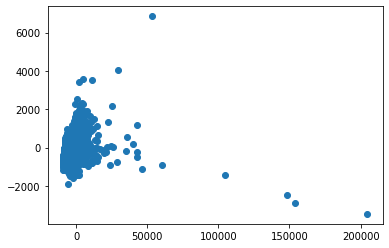

In [9]:
plt.scatter(data_pca[:, 0], data_pca[:, 1])

Now lets color code the points by category and see if we see and interesting pattern

In [10]:
data['pca1'] = data_pca[:, 0]

In [11]:
data['pca2'] = data_pca[:, 1]

In [12]:
data['label'] = [0 if price <= 120000 else 1 if price <= 200000 else 2 for price in data['SalePrice']]

Now lets color code the points by category and see if we see and interesting pattern

In [13]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,pca1,pca2,label
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,...,NoMisc,0,2,2008,WD,Normal,208500,-2066.085544,18.645781,2
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,...,NoMisc,0,5,2007,WD,Normal,181500,-912.611521,-12.300097,1
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,...,NoMisc,0,9,2008,WD,Normal,223500,733.618801,87.354921,2
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,...,NoMisc,0,2,2006,WD,Abnorml,140000,-971.377903,-53.739893,1
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,...,NoMisc,0,12,2008,WD,Normal,250000,3757.431395,639.158512,2


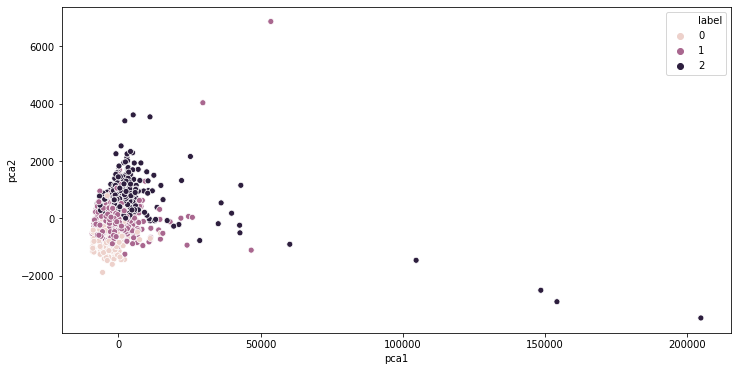

In [14]:
plt.figure(figsize=(12,6))
sns.scatterplot(data.pca1, data.pca2, hue=data.label)

In [15]:
data_num_no_outliers = data_num.drop([89, 524, 636, 706, 1299])

In [16]:
pca = PCA(n_components=2)

In [17]:
data_pca = pca.fit_transform(data_num_no_outliers)

In [20]:
data_num_no_outliers['pca1_no'] = data_pca[:, 0]

In [21]:
data_num_no_outliers['pca2_no'] = data_pca[:, 1]

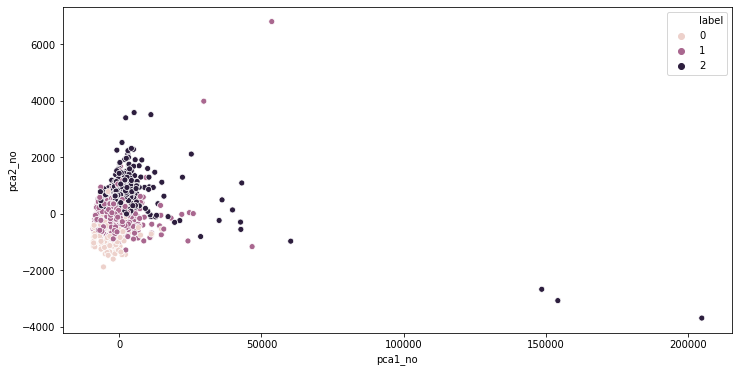

In [24]:
plt.figure(figsize=(12,6))
sns.scatterplot(data_num_no_outliers.pca1_no, data_num_no_outliers.pca2_no,
                hue=data.label.drop([89, 524, 636, 706, 1299]))

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
data_lda = lda.fit_transform(data_num_no_outliers, labels_no)

In [ ]:
data['lda1'] = data_lda[:, 0]

In [ ]:
data['lda2'] = data_lda[:, 1]

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data.lda1, data.lda2, hue=data.label)